In [1]:
import sys; sys.path.insert(0, '..') # So that we import the local copy of pyzx if you have installed from Github
import os

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

from multiprocessing import Pool
import pyzx as zx
from pyzx import cnot_mapper, architecture # Note that this is the local pyzx package from this repository/fork, not the one installed through pip or other means.
from pyzx import circuit
from pyzx import *
from pyzx.parity_maps import CNOT_tracker, build_random_parity_map
from pyzx.linalg import Mat2
from pyzx.simplify import full_reduce

Load comb circuits

In [2]:
comb_circuit_folder = "../circuits/combs/"

circuit_properties = {"Qubits"    : 3,
                      "CNOTs"     : 2,
                      "Non-CNOTs" : 1}
path = os.path.join(comb_circuit_folder, 
                    str(circuit_properties["Qubits"])+"qubits", 
                    str(circuit_properties["CNOTs"])+"cnots", 
                    str(circuit_properties["Non-CNOTs"])+"non-cnots")
loaded_circuits = []
if os.path.exists(path):
    for file_name in os.listdir(path):
        loaded_circuits.append(circuit.Circuit.from_qasm_file(os.path.join(path, file_name)))
else:
    print("Directory Does Not Exist")

Test which circuits fail equality check when normal gaussian elimination is applied

In [5]:
for circ in range(len(loaded_circuits)):
    # Decompose circuit
    comb_decomposition = CombDecomposition.from_circuit(loaded_circuits[circ].copy())
    comb = comb_decomposition.comb
    new_comb = CNOTComb(comb.qubits, comb.holes, comb.new_to_old_qubit_mappings)
    comb.matrix.gauss(full_reduce=True, x=new_comb)
    comb_decomposition.comb = new_comb
    new_circuit = CombDecomposition.to_circuit(comb_decomposition)
    print("{} : {}".format(circ, new_circuit.verify_equality(loaded_circuits[circ])))   


0 : True
1 : True
2 : True
3 : True
4 : True
5 : True
6 : True
7 : True
8 : True
9 : True
10 : False
11 : True
12 : True
13 : True
14 : True
15 : True
16 : True
17 : True
18 : True
19 : True
20 : True
21 : True
22 : False
23 : True
24 : True
25 : True
26 : True
27 : False
28 : True
29 : True
30 : True
31 : False
32 : True
33 : True
34 : True
35 : True
36 : True
37 : True
38 : True
39 : True
40 : True
41 : True
42 : False
43 : True
44 : True
45 : False
46 : True
47 : True
48 : True
49 : True
50 : True
51 : True
52 : True
53 : True
54 : True
55 : False
56 : True
57 : True
58 : True
59 : True
60 : True
61 : True
62 : True
63 : False
64 : True
65 : True
66 : True
67 : True
68 : True
69 : True
70 : True
71 : True
72 : True
73 : True
74 : True
75 : True
76 : True
77 : True
78 : True
79 : True
80 : True
81 : True
82 : True
83 : False
84 : True
85 : True
86 : True
87 : False
88 : True
89 : True
90 : True
91 : True
92 : True
93 : True
94 : True
95 : True
96 : True
97 : True
98 : True
99 : True


In [6]:
from ipywidgets import widgets
from IPython.display import display, Markdown

def plotter(circ):
    # Decompose circuit
    display(zx.draw(loaded_circuits[circ]))
    comb_decomposition = CombDecomposition.from_circuit(loaded_circuits[circ].copy())
    comb = comb_decomposition.comb
    new_comb = CNOTComb(comb.qubits, comb.holes, comb.new_to_old_qubit_mappings)
    comb.matrix.gauss(full_reduce=True, x=new_comb)
    display(zx.draw(comb))
    print(comb.gates)
    display(zx.draw(new_comb))
    print(new_comb.gates)
    comb_decomposition.comb = new_comb
    new_circuit = CombDecomposition.to_circuit(comb_decomposition)
    display(zx.draw(new_circuit))
    print(new_circuit.verify_equality(loaded_circuits[circ]))
    
w = widgets.interactive(plotter, circ=(0,len(loaded_circuits)-1))
slider = w.children[0]
slider.layout.width = "{!s}px".format(min(800,1000))
output = w.children[-1]
output.layout.height = "{!s}px".format(1200)
slider.value = 0
w

interactive(children=(IntSlider(value=0, description='circ', layout=Layout(width='800px'), max=99), Output(lay…

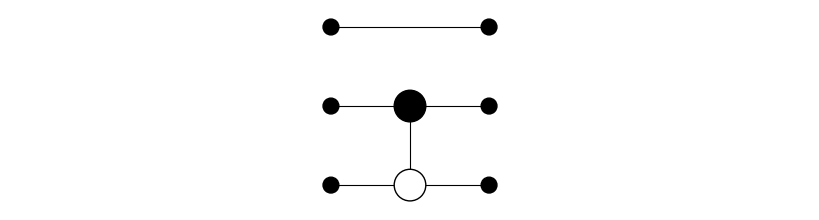

In [21]:
testMat = Mat2(np.array([
    [1, 0, 0, 0],
    [0, 1, 1, 1],
    [0, 0, 1, 1]
]))
tempCirc = CNOT_tracker(3)
testMat.gauss(full_reduce=True, x=tempCirc)
zx.draw(tempCirc)